## PROGRAMACIÓN 2
## EVALUACIÓN PARCIAL
### Unidad 3: Programación Orientada a Objetos en Python
### Unidad 4: Manipulación y Análisis de Datos con NumPy
### Nombres: Gabriel Alejandro Niama Martínez.
### Fecha: 24/07/2025
### Carrera: Ciencia de datos e inteligencia artificial.
### Periodo académico: 2025 - 1S
### Semestre: Segundo

### 1. __Recepción y exploración del dataset__ 

a. Descarga el dataset proporcionado por el docente.

b. Realiza un análisis exploratorio inicial: describe las variables, revisa
valores nulos, tipos de datos y estadísticas básicas.

In [3]:
# Paso 1: Carga de datos
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset desde scikit-learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Guardar el dataset como archivo CSV para entrega
df.to_csv("iris_dataset.csv", index=False)
print("✅ Dataset guardado como 'iris_dataset.csv'")

# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Información general
print("\nInformación del DataFrame:")
df.info()

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Comprobación de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())



✅ Dataset guardado como 'iris_dataset.csv'
Primeras filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Estadísticas descriptivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Valores nulos por columna:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


### 2. __Preprocesamiento de los datos__

a. Limpia los datos: elimina o imputa valores nulos, convierte tipos de
variables según sea necesario.

b. Realiza una exploración visual de las variables usando Plotly:

• Gráficos de dispersión (scatter)

• Histogramas (histogram)

• Cualquier otro gráfico relevante para visualizar la distribución y relaciones entre variables

#### __✔️ Preprocesamiento__
***En el dataset Iris no hay valores nulos ni problemas de tipo, pero igual lo validamos:***

In [4]:
# Verificamos tipos de datos
print(df.dtypes)

# Verificamos duplicados
print("\nCantidad de duplicados:", df.duplicated().sum())


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

Cantidad de duplicados: 1


### __📊 Visualización__

***1. Histograma por variable numérica***

In [5]:
import plotly.express as px

# Crear histogramas de las variables numéricas
for columna in iris.feature_names:
    fig = px.histogram(df, x=columna, color='target',
                       title=f"Histograma de {columna}",
                       labels={"target": "Clase"})
    fig.show()


***2. Gráfico de dispersión de pares de variables***

In [6]:
# Ejemplo: scatter plot entre longitud y ancho del pétalo
fig = px.scatter(df, x="petal length (cm)", y="petal width (cm)",
                 color=df["target"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"}),
                 title="Dispersión: Largo vs Ancho del Pétalo",
                 labels={"color": "Especie"})
fig.show()


***3. Scatter Matrix***

In [7]:
fig = px.scatter_matrix(df,
                        dimensions=iris.feature_names,
                        color=df["target"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"}),
                        title="Matriz de dispersión entre variables")
fig.show()


### 3. Selección de atributos usando la matriz de correlación

a. Calcula la matriz de correlación entre las variables numéricas.

b. Visualiza la matriz de correlación usando Plotly (puedes usar plotly.express.imshow o una gráfica similar).

c. Selecciona un subconjunto de atributos que no estén fuertemente correlacionados entre sí (por ejemplo, con coeficiente de correlación <0.8 en valor absoluto).

d. Justifica la selección de estos atributos en tu reporte.

__✔️ 1. Calcular la matriz de correlación__


In [8]:
# Matriz de correlación de las variables numéricas
correlacion = df[iris.feature_names].corr()
print("Matriz de correlación:")
display(correlacion)


Matriz de correlación:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


__✔️ 2. Visualizar la matriz con Plotly__

In [9]:
import plotly.express as px

fig = px.imshow(correlacion,
                text_auto=True,
                title="Matriz de correlación - Iris dataset")
fig.show()


__✔️ 3. Selección de atributos no fuertemente correlacionados__

Vamos a aplicar una regla simple: descartamos variables con correlación mayor a `0.8` (en valor absoluto). Observando la matriz, notamos por ejemplo:

+ `'petal length (cm)'` y `'petal width (cm)'` tienen alta correlación (≈ 0.96)

+ `'sepal length (cm)'` y `'sepal width (cm)'` tienen baja correlación (≈ -0.12)

In [10]:
atributos_seleccionados = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']
print("Atributos seleccionados:", atributos_seleccionados)


Atributos seleccionados: ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']


__Justificación:__ eliminamos `'petal length (cm)'` por estar muy correlacionado con `'petal width (cm)'`, que es más relevante para distinguir clases visualmente.

### 4. Modelado de Machine Learning

a. Selecciona un modelo adecuado de scikit-learn (por ejemplo, RandomForestClassifier, LogisticRegression, DecisionTreeRegressor, etc.).

b. Divide los datos en conjunto de entrenamiento y prueba.

c. Entrena el modelo usando solo los atributos seleccionados.

d. Evalúa el desempeño del modelo con métricas adecuadas(accuracy, precisión, recall, RMSE, etc., según el caso).

e. Guarda el modelo entrenado como modelo.pkl usando pickle:

import pickle

with open('modelo.pkl', 'wb') as archivo_salida:

 pickle.dump(modelo, archivo_s

***Usaremos el modelo RandomForestClassifier, que es fácil de entrenar, da buenos resultados y no requiere normalización.***

__✔️ 1. Separar en entrenamiento y prueba__

In [11]:
from sklearn.model_selection import train_test_split

# Variables de entrada y salida
X = df[atributos_seleccionados]
y = df['target']

# Separar 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


__✔️ 2. Entrenar el modelo__

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

__✔️ 3. Evaluar el modelo__

Accuracy: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



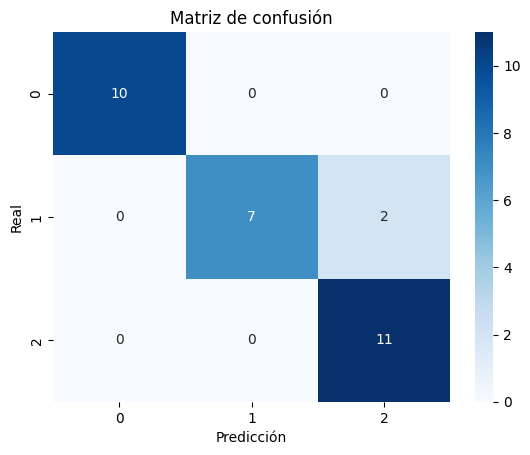

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = modelo.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


__✔️ 4. Guardar el modelo__

In [14]:
import pickle

# Guardar modelo entrenado
with open('modelo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

print("✅ Modelo guardado como modelo.pkl")


✅ Modelo guardado como modelo.pkl


### 5. Presentación de resultados

a. Incluye en tu notebook o script todas las visualizaciones generadas (con Plotly) y los pasos realizados.

b. Genera un PDF con capturas de pantalla de las gráficas, matriz de correlación, justificación de atributos seleccionados y las conclusiones sobre el análisis y el modelo

### COMPLETADO :)